### <strong><font color=cornflowerblue>第二次作品：常態分配的平均數 &mu; 與標準差 &sigma; 的最大概似估計實驗</font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：

此次作品將介紹最大概似估計（MLE）的概念，並展示其運算方式及示意圖。以下是具體的實驗步驟：

1. 令 $x_1, x_2, \ldots, x_N$ 為 $N$ 個來自常態分配 $N(\mu, \sigma)$ 的獨立樣本，假設 $\mu$ 未知， $\sigma$ 已知且為 1 的情況下，定義聯合概似函數 $L(\mu, \sigma = 1 | x_1, x_2, \ldots, x_N)$，
自訂 $\mu$ 值，並透過改變 $\mu$ 值進行函數運算，
繪製出聯合概似函數圖，以視覺化的方式更直觀地去觀察其最大值所在，以此找出對應的估計值 $\hat{\mu}$。
接著，重複前述的實驗步驟，觀察不同樣本對估計值 $\hat{\mu}$ 的影響。
再來，進一步改變樣本數 $N$，並重複實驗步驟，觀察樣本數 $N$ 對估計值 $\hat{\mu}$ 的影響。

2. 使用演算法 scipy.optimize.minimize_scalar() 來找出最大概似估計值，並與傳統計算 MLE 的 formula（$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^{N}x_i$） 以及 Grid Search（目標一的方法）進行比較，觀察它們之間的差異。

3. 令 $\mu$ 與 $\sigma$ 未知，取樣本數 $N = 100$，定義對數聯合概似函數 $L(\mu, \; \sigma \; | x_1, x_2, \ldots, x_N)$，計算出最大概似估計值 MLE，並繪製出等高線圖 Contour Plot 與立體圖 3D Plot，觀察估計量 $\hat{\mu}$ 與 $\hat{\sigma}$ 的變化。


<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：

令 $x_1, x_2, \ldots, x_N$ 為 $N$ 個來自常態分配 $N(\mu, \sigma)$ 的獨立樣本，假設 $\mu$ 未知， $\sigma$ 已知且為 1 的情況下，定義聯合概似函數 $L(\mu, \sigma = 1 | x_1, x_2, \ldots, x_N)$，
自訂 $\mu$ 值，並透過改變 $\mu$ 的值進行函數運算，
繪製出聯合概似函數圖，以視覺化的方式更直觀地去觀察其最大值所在，以此找出對應的估計值 $\hat{\mu}$。
接著，重複前述的實驗步驟，觀察不同樣本對估計值 $\hat{\mu}$ 的影響。
再來，進一步改變樣本數 $N$，並重複實驗步驟，觀察樣本數 $N$ 對估計值 $\hat{\mu}$ 的影響。

##### <strong><font color=indianred>步驟 1</font></strong>：假設 $\mu$ = 0，$\sigma$ = 1，取樣本數 $N = 100$，定義出簡略的聯合概似函數 $L(\mu = 0, \sigma = 1 | x_1, x_2, \ldots, x_N)$，並計算出最大概似估計值

In [9]:
from scipy.stats import norm
import numpy as np
from IPython.display import display, Math

# 設定參數
N = 100
mu = 0
sigma = 1
x = norm.rvs(loc = mu, scale = sigma, size = N)

# 定義出聯合概似函數
def L(x, mu, sigma):
    L_value = np.prod(norm.pdf(x, loc = mu, scale = sigma))
    # return print('運算結果:', 'mu:', mu, ', max_L:', L)
    display(Math(r'\text{{運算結果：}} \mu = {},\; L(\mu) = {}'.format(mu, L_value)))

L(x, mu, sigma)

<IPython.core.display.Math object>

##### 步驟 2：假設 $\sigma$ = 1，自訂 $\mu$ 值，並透過改變 $\mu$ 值進行函數運算，繪製出 $2 \times 2$ 不同樣本的聯合概似函數圖，觀察估計量 $\hat{\mu}$ 的變化

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

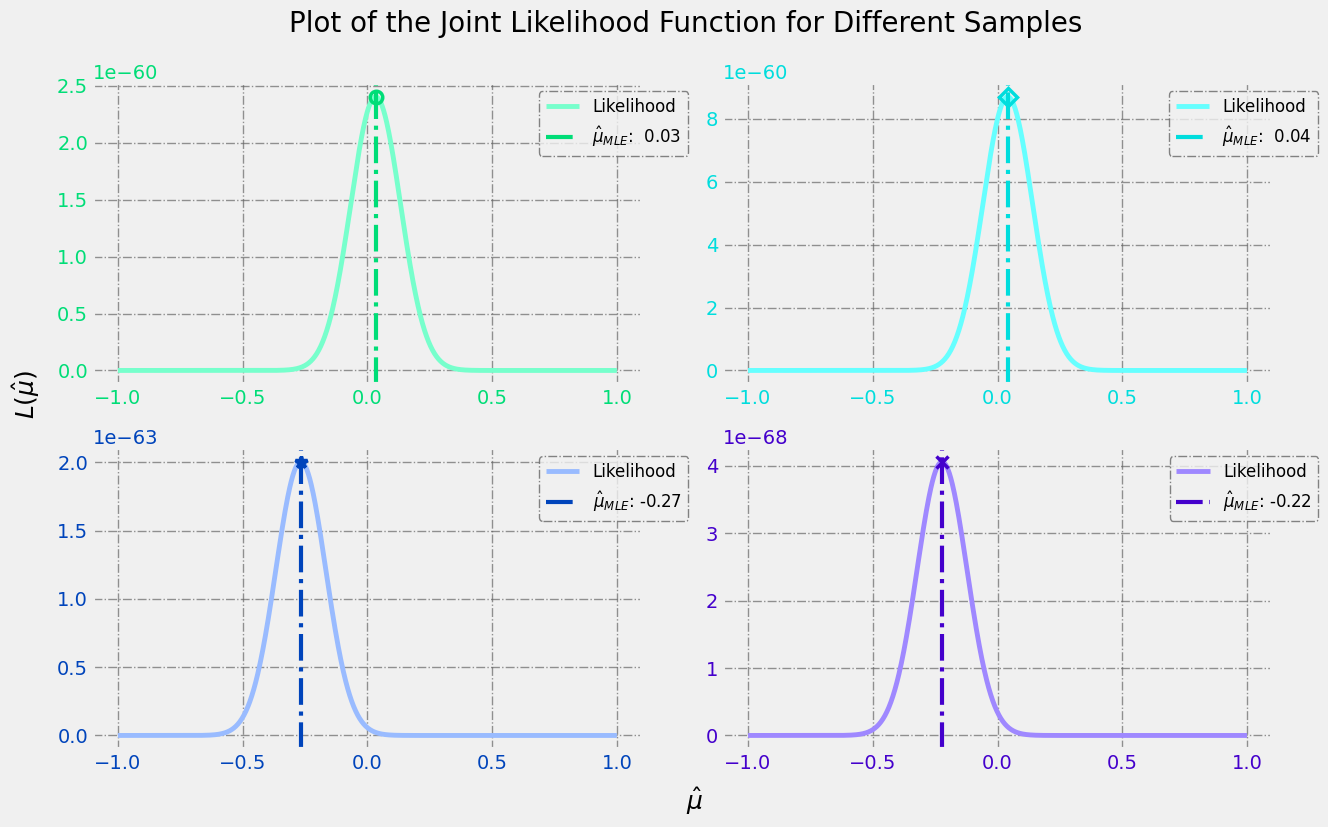

In [152]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, Math

# 設定參數
N = 100
mu = 0
sigma = 1

# 定義出聯合概似函數
mu_values = np.linspace(-1, 1, 1000)

def L(x, mu_values, sigma):
    L = np.zeros(len(mu_values))
    for i in range(len(mu_values)):
        L[i] = np.prod(norm.pdf(x, loc = mu_values[i], scale = sigma))  # 沒取 log 的版本
    
    # 找出聯合概似函數的最大值，以此作為 mu 的估計值
    max_L_index = np.argmax(L)
    return mu_values, L, max_L_index

# 創建子圖
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize = (13, 8))
line_cols = ['#77FFCC', '#66FFFF', '#99BBFF', '#9F88FF']
vline_cols = ['#00DD77', '#00DDDD', '#0044BB', '#4400CC']
marker_stys = ['o', 'D', '*', 'x']

for i, (line_col, vline_col, marker_sty) in enumerate(zip(line_cols, vline_cols, marker_stys)):
    x = norm.rvs(loc = mu, scale = sigma, size = N)  # 每次迴圈生成新的樣本數據
    mu_values, L_values, max_L_index = L(x, mu_values, sigma)
    # 顯示出每次運算的 mu 估計值，以及對應的聯合概似函數的最大值
    # print('第', i + 1, '次運算結果:', 'mu:', mu_values[max_L_index], ', max_L:', L_values[max_L_index])
    display(Math(r'\text{{第}}\; {}\; \text{{次運算結果：}}\; \hat{{\mu}} = {:.2f},\; L(\hat{{\mu}}) = {}'.format(i+1, mu_values[max_L_index], L_values[max_L_index])))

    ax = axs[i // 2, i % 2]  # 獲取當前的子圖
    ax.plot(mu_values, L_values, label = 'Likelihood', color = line_col, lw = 3.5
            , linestyle = '-')
    ax.plot(mu_values[max_L_index], L_values[max_L_index], marker_sty
            , markerfacecolor = 'none', markeredgecolor = vline_col, markersize = 9, markeredgewidth = 2.5)
    ax.axvline(x = mu_values[max_L_index], color = vline_col, linestyle = '-.', lw = 3
               , label = f'$\hat{{\mu}}_{{MLE}}$: {mu_values[max_L_index] : .2f}')
    # ax.set_xlabel('$\mu$')
    # ax.set_ylabel('$L(\mu, \sigma)$')
    # ax.set_title('Likelihood function: N = {}'.format(N))
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    legend = ax.legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666', loc = 'upper right'
                       , bbox_to_anchor = (1.1, 1.0))
    legend.get_frame().set_linestyle('-.')  # 設置圖例外框的 linestyle
    legend.get_frame().set_linewidth(1)  # 設置圖例外框的 linestyle
    ax.tick_params(axis = 'both', colors = vline_col)
    ax.grid(True, linestyle = '-.', alpha = 0.7, color = '#666666')

fig.text(-0.02, 0.5, '$L(\hat{\mu})$', va = 'center', rotation = 'vertical', fontsize = 18, color = 'black')
fig.text(0.5, -0.02, '$\hat{\mu}$', fontsize = 18, color = 'black')
# plt.suptitle('不同樣本下的聯合概似函數圖', fontproperties = fonts, fontsize = 20)
plt.suptitle('Plot of the Joint Likelihood Function for Different Samples', fontsize = 20)
plt.tight_layout()
plt.show()

##### 步驟 3：改變樣本數 $N$，重複步驟 2 的實驗步驟，觀察估計量 $\hat{\mu}$ 的變化

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

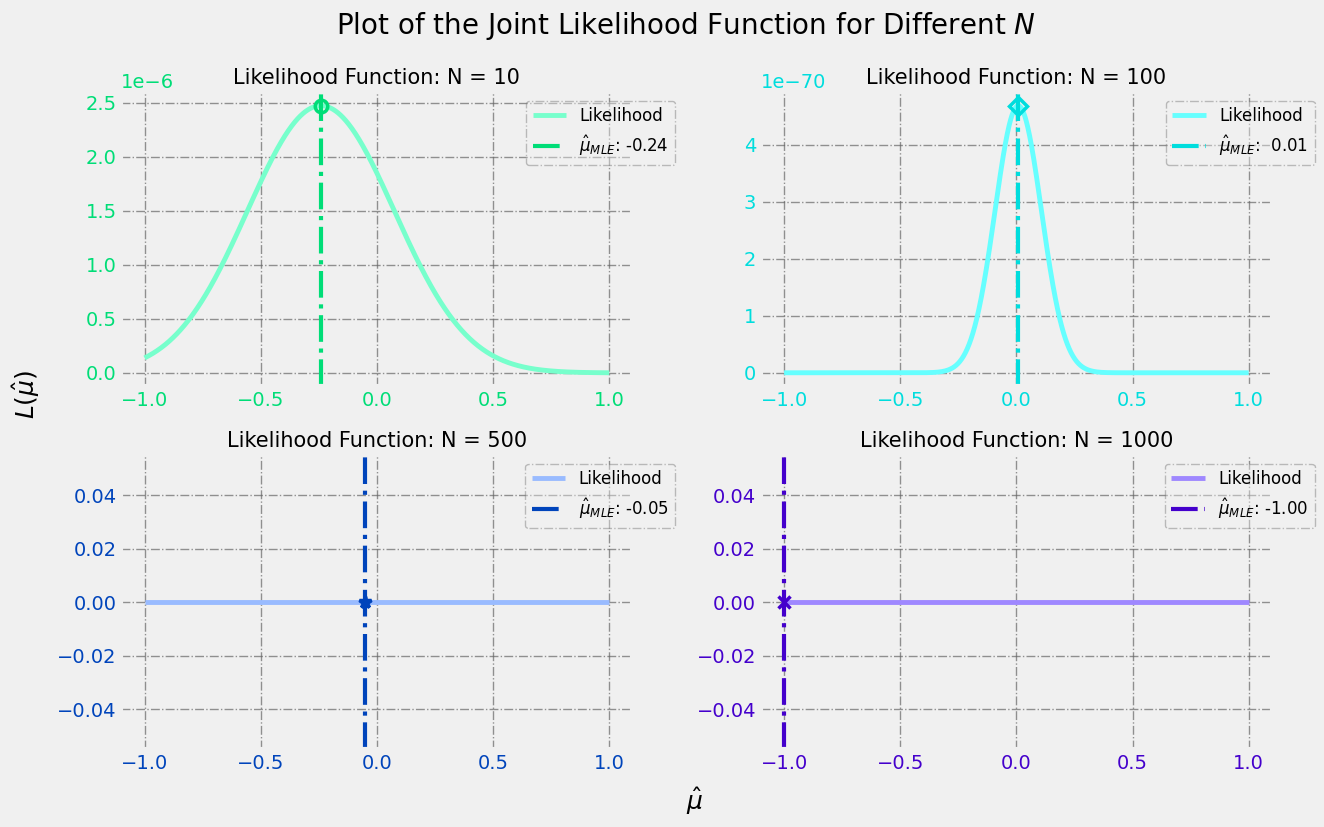

In [154]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, Math

# 設定母體參數
mu = 0
sigma = 1
# 設定樣本參數
N_values = [10, 100, 500, 1000]
mu_values = np.linspace(-1, 1, 1000)   # 生成 1000 個 mu 的估計值

# 定義出聯合概似函數
def L(x, mu_values, sigma):
    L = np.zeros(len(mu_values))
    for i in range(len(mu_values)):
        L[i] = np.prod(norm.pdf(x, loc = mu_values[i], scale = sigma))  # 沒取 log 的版本
    
    # 找出聯合概似函數的最大值，以此作為 mu 的估計值
    max_L_index = np.argmax(L)
    return mu_values, L, max_L_index

# 創建子圖
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize = (13, 8))
line_cols = ['#77FFCC', '#66FFFF', '#99BBFF', '#9F88FF']
vline_cols = ['#00DD77', '#00DDDD', '#0044BB', '#4400CC']
marker_stys = ['o', 'D', '*', 'x']

for i, (N, line_col, vline_col, marker_sty) in enumerate(zip(N_values, line_cols, vline_cols, marker_stys)):
    x = norm.rvs(loc = mu, scale = sigma, size = N)  # 每次迴圈生成新的樣本數據
    mu_values, L_values, max_L_index = L(x, mu_values, sigma)
    # 顯示出每次運算的 mu 估計值，以及對應的聯合概似函數的最大值
    # print('第', i + 1, '次運算結果:', 'mu:', mu_values[max_L_index], ', max_L:', L_values[max_L_index])
    display(Math(r'\text{{第}}\; {}\; \text{{次運算結果：}}\; \hat{{\mu}} = {:.2f},\; L(\hat{{\mu}}) = {}'.format(i+1, mu_values[max_L_index], L_values[max_L_index])))

    ax = axs[i // 2, i % 2]  # 獲取當前的子圖
    ax.plot(mu_values, L_values, label = 'Likelihood', color = line_col, lw = 3.5
            , linestyle = '-')
    ax.plot(mu_values[max_L_index], L_values[max_L_index], marker_sty
            , markerfacecolor = 'none', markeredgecolor = vline_col, markersize = 9, markeredgewidth = 2.5)
    ax.axvline(x = mu_values[max_L_index], color = vline_col, linestyle = '-.', lw = 3
               , label = f'$\hat{{\mu}}_{{MLE}}$: {mu_values[max_L_index] : .2f}')
    # ax.set_xlabel('$\mu$')
    # ax.set_ylabel('$L(\mu, \sigma)$')
    ax.set_title('Likelihood Function: N = {}'.format(N), fontsize = 15)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    legend = ax.legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666', loc = 'upper right'
                       , bbox_to_anchor = (1.1, 1.0))
    legend.get_frame().set_linestyle('-.')  # 設置圖例外框的 linestyle
    legend.get_frame().set_linewidth(1)  # 設置圖例外框的 linestyle
    legend.get_frame().set_alpha(0.4)  # 設置圖例外框的 linestyle
    ax.tick_params(axis = 'both', colors = vline_col)
    ax.grid(True, linestyle = '-.', alpha = 0.7, color = '#666666')

fig.text(-0.02, 0.5, '$L(\hat{\mu})$', va = 'center', rotation = 'vertical', fontsize = 18, color = 'black')
fig.text(0.5, -0.02, '$\hat{\mu}$', fontsize = 18, color = 'black')
# plt.suptitle('不同樣本下的聯合概似函數圖', fontproperties = fonts, fontsize = 20)
plt.suptitle('Plot of the Joint Likelihood Function for Different $N$', fontsize = 20)
plt.tight_layout()
plt.show()

##### 步驟 4：聯合概似函數取對數 $log$，轉換成對數聯合概似函數 $log\ L(\mu, \sigma = 1 | x_1, x_2, \ldots, x_N)$ ，重複步驟 3 的實驗步驟，觀察估計量 $\hat{\mu}$ 的變化

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

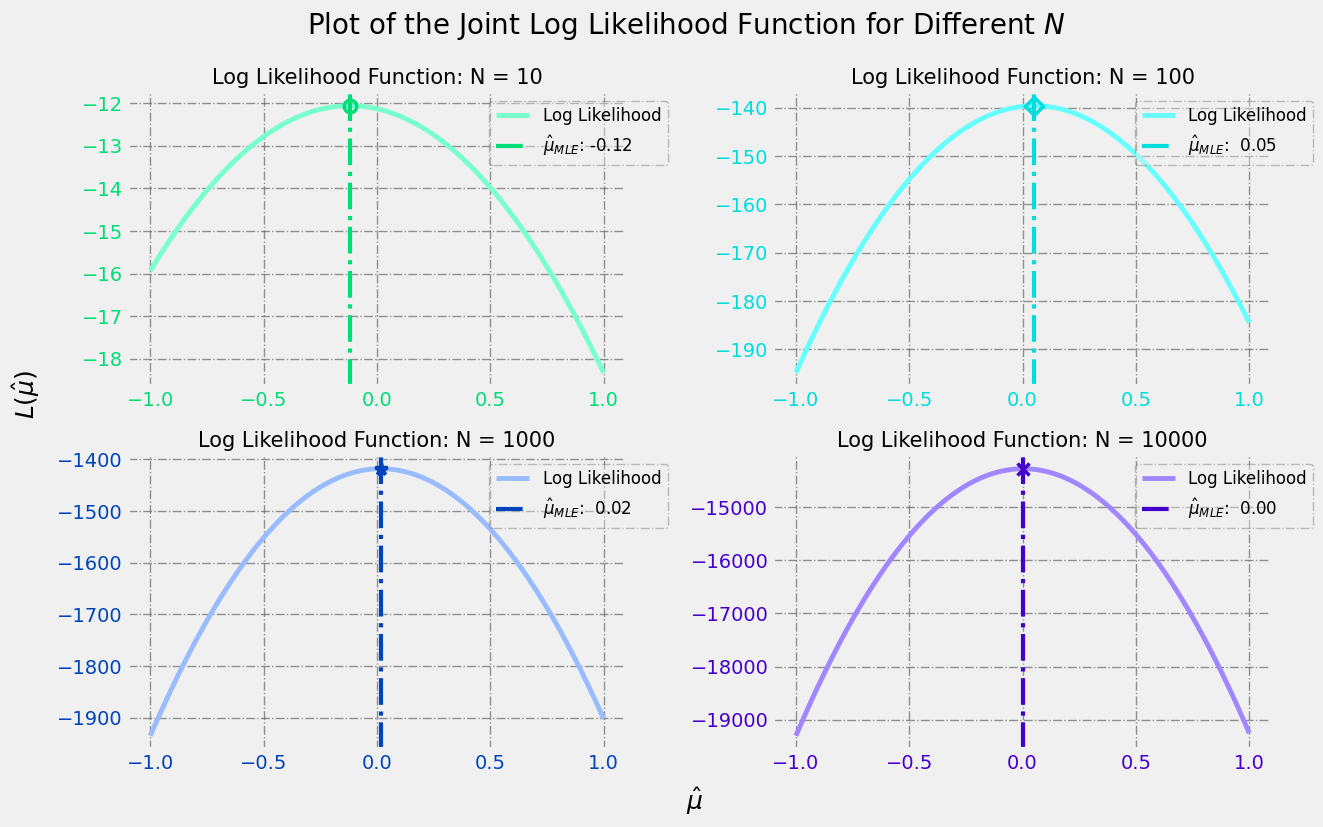

In [160]:
from scipy.stats import norm
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, Math

# 設定母體參數
mu = 0
sigma = 1
# 設定樣本參數
N_values = [10, 100, 1000, 10000]
mu_values = np.linspace(-1, 1, 1000)   # 生成 1000 個 mu 的估計值

# 定義出聯合概似函數
def L(x, mu_values, sigma):
    L = np.zeros(len(mu_values))
    for i in range(len(mu_values)):
        # L[i] = np.prod(norm.pdf(x, loc = mu_values[i], scale = sigma))  # 沒取 log 的版本
        L[i] = np.sum(np.log(norm.pdf(x, loc = mu_values[i], scale = sigma)))  # 取 log 的版本
    
    # 找出聯合概似函數的最大值，以此作為 mu 的估計值
    max_L_index = np.argmax(L)
    return mu_values, L, max_L_index

# 創建子圖
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize = (13, 8))
line_cols = ['#77FFCC', '#66FFFF', '#99BBFF', '#9F88FF']
vline_cols = ['#00DD77', '#00DDDD', '#0044BB', '#4400CC']
marker_stys = ['o', 'D', '*', 'x']

for i, (N, line_col, vline_col, marker_sty) in enumerate(zip(N_values, line_cols, vline_cols, marker_stys)):
    x = norm.rvs(loc = mu, scale = sigma, size = N)  # 每次迴圈生成新的樣本數據
    mu_values, L_values, max_L_index = L(x, mu_values, sigma)
    # 顯示出每次運算的 mu 估計值，以及對應的聯合概似函數的最大值
    # print('第', i + 1, '次運算結果:', 'mu:', mu_values[max_L_index], ', max_L:', L_values[max_L_index])
    display(Math(r'\text{{第}}\; {}\; \text{{次運算結果：}}\; \hat{{\mu}} = {:.2f},\; ln\ L(\hat{{\mu}}) = {:.2f}'.format(i+1, mu_values[max_L_index], L_values[max_L_index])))

    ax = axs[i // 2, i % 2]  # 獲取當前的子圖
    ax.plot(mu_values, L_values, label = 'Log Likelihood', color = line_col, lw = 3.5
            , linestyle = '-')
    ax.plot(mu_values[max_L_index], L_values[max_L_index], marker_sty
            , markerfacecolor = 'none', markeredgecolor = vline_col, markersize = 9, markeredgewidth = 2.5)
    ax.axvline(x = mu_values[max_L_index], color = vline_col, linestyle = '-.', lw = 3
               , label = f'$\hat{{\mu}}_{{MLE}}$: {mu_values[max_L_index] : .2f}')
    # ax.set_xlabel('$\mu$')
    # ax.set_ylabel('$L(\mu, \sigma)$')
    ax.set_title('Log Likelihood Function: N = {}'.format(N), fontsize = 15)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    legend = ax.legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666', loc = 'upper right'
                       , bbox_to_anchor = (1.1, 1.0))
    legend.get_frame().set_linestyle('-.')  # 設置圖例外框的 linestyle
    legend.get_frame().set_linewidth(1)  # 設置圖例外框的 linestyle
    legend.get_frame().set_alpha(0.4)  # 設置圖例外框的 linestyle
    ax.tick_params(axis = 'both', colors = vline_col)
    ax.grid(True, linestyle = '-.', alpha = 0.7, color = '#666666')

fig.text(-0.02, 0.5, '$L(\hat{\mu})$', va = 'center', rotation = 'vertical', fontsize = 18, color = 'black')
fig.text(0.5, -0.02, '$\hat{\mu}$', fontsize = 18, color = 'black')
# plt.suptitle('不同樣本下的聯合概似函數圖', fontproperties = fonts, fontsize = 20)
plt.suptitle('Plot of the Joint Log Likelihood Function for Different $N$', fontsize = 20)
plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=indianred>觀察</font>**：
- 步驟 1 先假設母體參數 $\mu$ = 0，$\sigma$ = 1，並取樣本數 $N = 100$，然後定義出簡略的聯合概似函數 \
 $L(\mu = 0, \sigma = 1 | x_1, x_2, \ldots, x_N)$，並計算出聯合概似函數值 $L(\mu)$。

- 步驟 2 重複步驟 1 的實驗步驟，但假設母體參數 $\mu$ 未知，自訂 $\hat{\mu}$ 值，從區間 [-1, 1] 中取 1000 筆 $\hat{\mu}$ 值進行函數運算，繪製出 $2 \times 2$ 不同樣本的聯合概似函數圖，計算出聯合概似函數值 $L(\hat{\mu})$，並找出所對應的 $\hat{\mu}$ 值，也就是最大概似估計值。從四張圖中可見聯合概似函數的最大值皆落在 $\mu = 0$ 的附近，但都沒落在 $\mu = 0$ 上，就算重複實驗也只有很小的機率可以看到最大值落在 $\mu = 0$ 上，表示在樣本數 $N = 100$ 的情況下，其估計結果與母體參數還存在著誤差。

- 步驟 3 重複步驟 2 的實驗步驟，但令四張圖的樣本數 $N$ 分別為 10、100、500、1000，觀察隨著樣本數的增加，其估計量 $\hat{\mu}$ 的變化。從四張圖中可發現當樣本數為 500 時，聯合概似函數會呈現成一條直線，且繼續增加樣本數也不會再出現變化。這是因為隨著樣本數的增加，計算出的聯合概似函數值會變得越來越小，一旦值太小，python 的繪圖機制就無法將其呈現出來，會直接將其當成 0，因此就出現了上圖的情況。

- 為了解決步驟 3 遇到的問題，步驟 4 將聯合概似函數取對數 $log$，轉換成對數聯合概似函數 $log\ L(\mu, \sigma = 1 | x_1, x_2, \ldots, x_N)$，重複步驟 3 的實驗步驟，觀察估計量 $\hat{\mu}$ 的變化。從四張圖中可見聯合概似函數的最大值隨著樣本數 $N$ 的增加，會逐漸接近並落在 $\mu = 0$ 上，表示樣本數越大，估計出的最大概似估計值將會無限接近於母體參數 $\mu$，符合 MLE 在樣本數很大時會收斂到母體參數的性質。

**<font color=indianred>結論</font>**：
- 在計算聯合概似函數 $L(\mu, \sigma = 1 | x_1, x_2, \ldots, x_N)$ 時，需先將其轉換成對數聯合概似函數 $log\ L(\mu, \sigma = 1 | x_1, x_2, \ldots, x_N)$，以避免計算出的函數值太小，造成估計最大概似估計值的困難。

- 隨著樣本數 $N$ 越大，最大概似估計值會越接近母體參數值，證實了最大概似估計 MLE 存在著在大樣本的情況下會約等於其真實母體參數的性質。

<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：

使用演算法 scipy.optimize.minimize_scalar() 來找出最大概似估計值 $\hat{\mu}_{MLE}$，並與傳統計算 MLE 的 Formula（$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^{N}x_i$） 以及 Grid Search（目標一的實驗方法）進行比較，觀察它們之間的計算差異。


##### <strong><font color=indianred>步驟 1</font></strong>：令 $\mu$ = 0，$\sigma$ = 1，取樣本數 $N = 100$，利用演算法 scipy.optimize.minimize_scalar() 來找出最大概似估計值

In [15]:
from scipy.optimize import minimize
from scipy.stats import norm
from IPython.display import display, Math

# 設定參數
N = 100
mu = 0
sigma = 1

# 生成樣本
x = norm.rvs(loc = mu, scale = sigma, size = N)

# 定義出對數概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))
# 定義出負對數概似函數
def minus_log_likelihood(mu):
    return -log_likelihood(x, mu, sigma)    # minimize 只能最小化，所以多加負號, 這樣就變成最大化

result = minimize(minus_log_likelihood, 0)  # minimize 第一個參數是放入最小化的函數，第二個參數是預期收斂到的值

# 顯示出最大概似估計值
L_value = result.fun
mle_mu = result.x[0]
display(Math(r'\text{{運算結果：}} \hat{{\mu}}_{{MLE}} = {:.2f},\; \
              L(\hat{{\mu}}) = {:.2f}'.format(mle_mu, L_value)))

<IPython.core.display.Math object>

##### <strong><font color=indianred>步驟 2</font></strong>：令 $\sigma$ = 1，自訂 $\mu$ 值與樣本數 $N$，並透過改變它們來進行函數運算，繪製出 $2 \times 2$ 不同樣本的對數聯合概似函數圖，觀察估計量 $\hat{\mu}$ 的變化

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

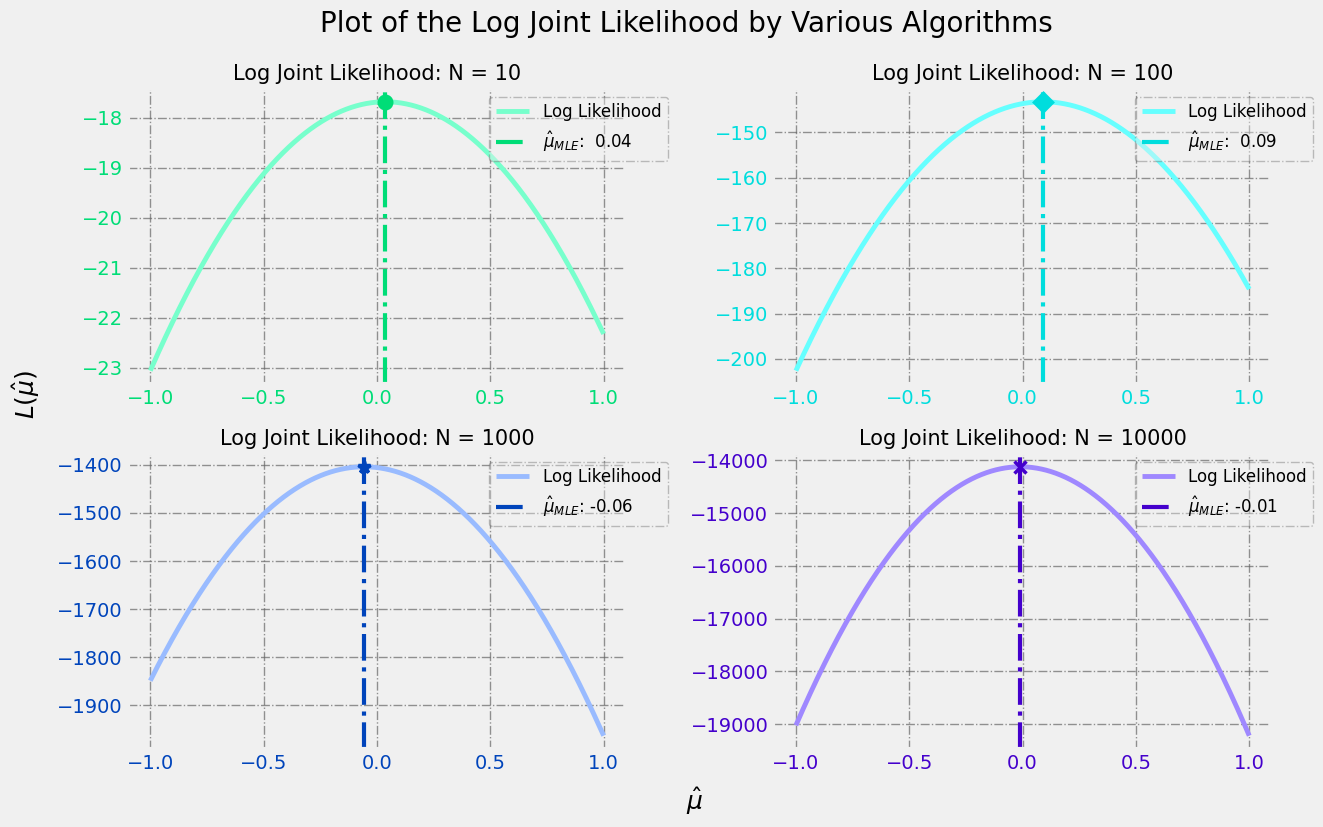

In [17]:
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, Math

# 定義出對數似然函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 定義出負對數似然函數
def minus_log_likelihood(mu):
    return -log_likelihood(x, mu, sigma)

# 設定母體參數
mu = 0
sigma = 1
# 設定樣本參數
N_values = [10, 100, 1000, 10000]
mu_values = np.linspace(-1, 1, 1000)   # 生成 1000 個 mu 的估計值

# 繪圖
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize = (13, 8))
line_cols = ['#77FFCC', '#66FFFF', '#99BBFF', '#9F88FF']
vline_cols = ['#00DD77', '#00DDDD', '#0044BB', '#4400CC']
marker_stys = ['o', 'D', '*', 'x']

for i, (N, line_col, vline_col, marker_sty) in enumerate(zip(N_values, line_cols, vline_cols, marker_stys)):
    x = norm.rvs(loc = mu, scale = sigma, size = N)
    
    result = minimize(minus_log_likelihood, 0)
    mu_estimate = result.x[0]
    L_value = result.fun
    display(Math(r'\text{{第}}\; {}\; \text{{次運算結果：}}\; \hat{{\mu}}_{{MLE}} = {:.2f},\; \
                  ln\ L(\hat{{\mu}}) = {:.2f}'.format(i + 1, mu_estimate, L_value)))
    
    # 計算對數概似函數的值
    log_likelihood_values = [log_likelihood(x, mu_value, sigma) for mu_value in mu_values]
    
    # 繪圖
    ax = axs[i // 2, i % 2]  # 獲取當前的子圖
    ax.plot(mu_values, log_likelihood_values, label = 'Log Likelihood', color = line_col, lw = 3.5
            , linestyle = '-')
    ax.plot(mu_estimate, log_likelihood(x, mu_estimate, sigma), marker_sty
            , markerfacecolor = vline_col, markeredgecolor = vline_col, markersize = 9, markeredgewidth = 2.5)
    ax.axvline(x = mu_estimate, color = vline_col, linestyle = '-.', lw = 3
               , label = f'$\hat{{\mu}}_{{MLE}}$: {mu_estimate : .2f}')
    ax.set_title('Log Joint Likelihood: N = {}'.format(N), fontsize = 15)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    legend = ax.legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666', loc = 'upper right'
                       , bbox_to_anchor = (1.1, 1.0))
    legend.get_frame().set_linestyle('-.')  # 設置圖例外框的 linestyle
    legend.get_frame().set_linewidth(1)     
    legend.get_frame().set_alpha(0.4)       
    ax.tick_params(axis = 'both', colors = vline_col)
    ax.grid(True, linestyle = '-.', alpha = 0.7, color = '#666666')

fig.text(-0.02, 0.5, '$L(\hat{\mu})$', va = 'center', rotation = 'vertical', fontsize = 18, color = 'black')
fig.text(0.5, -0.02, '$\hat{\mu}$', fontsize = 18, color = 'black')
plt.suptitle('Plot of the Log Joint Likelihood by Various Algorithms', fontsize = 20)
plt.tight_layout()
plt.show()

##### 步驟 3：與傳統計算 MLE 的 Formula（$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^{N}x_i$）以及 Grid Search（目標一的方法）進行比較，並觀察它們之間的差異

定義符號：
- By Formula 估計量 : $\hat{\mu}_{F}$

- By Grid Search 估計量 : $\hat{\mu}_{G}$

- By Various Algorithms 估計量 : $\hat{\mu}_{V}$

<IPython.core.display.Math object>

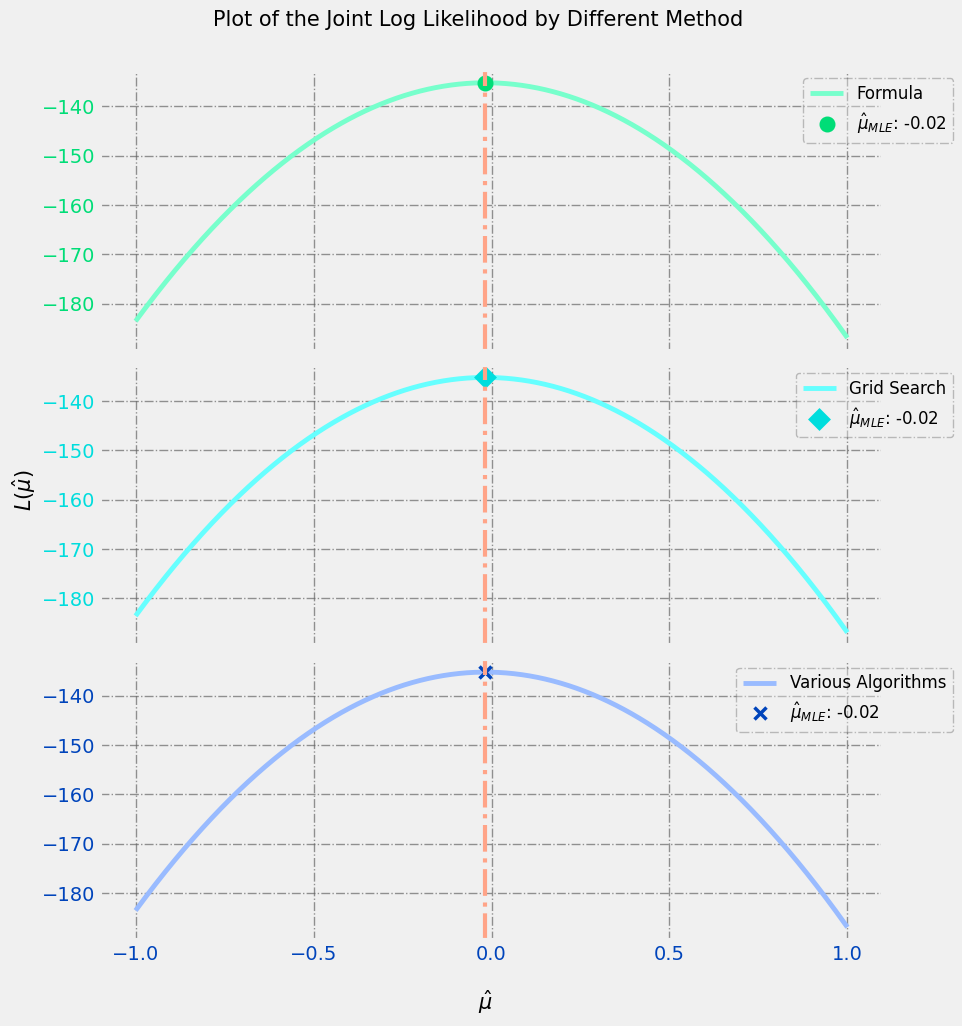

In [14]:
from scipy.stats import norm
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display, Math

# 定義出對數似然函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 定義出負對數似然函數
def minus_log_likelihood(mu):
    return -log_likelihood(x, mu, sigma)

# 設定母體參數
mu = 0
sigma = 1
N = 100
# 設定樣本參數
mu_values = np.linspace(-1, 1, 1000)   # 生成 1000 個 mu 的估計值

# 繪圖
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(3, 1, figsize = (9, 10), sharex = True)

line_col = ['#77FFCC', '#66FFFF', '#99BBFF']
vline_col = ['#00DD77', '#00DDDD', '#0044BB']
marker_sty = ['o', 'D', 'x']

# 生成樣本
x = norm.rvs(loc = mu, scale = sigma, size = N)

# by algorithm
result = minimize(minus_log_likelihood, 0)
mu_algo = result.x[0]
L_value = result.fun

# by grid search
log_likelihood_values = [log_likelihood(x, mu_value, sigma) for mu_value in mu_values]
max_L_index = np.argmax(log_likelihood_values)
mu_by_gridsearch = mu_values[max_L_index]

# by formula
mu_formula = x.mean()

# 顯示計算結果
display(Math(r'\text{{運算結果：}}\; \hat{{\mu}}_{{F}} = {:.2f},\; \
            \hat{{\mu}}_{{G}} = {:.2f},\; \
            \hat{{\mu}}_{{V}} = {:.2f}'.format(mu_formula, mu_by_gridsearch, mu_algo)))

# 繪圖
mu_estimates = [mu_formula, mu_by_gridsearch, mu_algo]
legend_labels = ['Formula', 'Grid Search', 'Various Algorithms']
lgnd_labels = ['F', 'G', 'V']

for i, (mu_estimate, legend_label) in enumerate(zip(mu_estimates, legend_labels)):
    ax[i].plot(mu_values, log_likelihood_values, label = legend_label, color = line_col[i], lw = 3.5
            , linestyle = '-')
    ax[i].plot(mu_estimate, log_likelihood(x, mu_estimate, sigma), marker_sty[i]
            , markerfacecolor = vline_col[i], markeredgecolor = vline_col[i], markersize = 9
            , markeredgewidth = 2.5, label = f'$\hat{{\mu}}_{{MLE}}$: {mu_estimate : .2f}')
    ax[i].axvline(x = mu_estimate, color = '#FFA488', linestyle = '-.', lw = 3)
    ax[i].set_xticks(np.arange(-1, 1.1, 0.5))
    legend = ax[i].legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666'
                          , loc = 'upper right', bbox_to_anchor = (1.1, 1.0))
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.4)
    ax[i].tick_params(axis = 'both', colors = vline_col[i])
    ax[i].grid(True, linestyle = '-.', alpha = 0.7, color = '#666666')

fig.text(-0.02, 0.5, '$L(\hat{\mu})$', va = 'center', rotation = 'vertical', fontsize = 15, color = 'black')
fig.text(0.5, -0.02, '$\hat{\mu}$', fontsize = 15, color = 'black')
plt.suptitle('Plot of the Joint Log Likelihood by Different Method', fontsize = 15)
plt.subplots_adjust(hspace = 0.05, top = 0.92, bottom = 0.05)
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=indianred>觀察</font>**：
- 步驟一假設 $\mu = 0$，$\sigma = 1$，取樣本數 $N = 100$，利用演算法 scipy.optimize.minimize_scalar() 來找出最大概似估計值，可見運算結果的估計值接近母體參數 $\mu = 0$，但還無法確定此演算法可用於推估最大概似估計值。

- 步驟二假設 $\sigma$ = 1，自訂 $\mu$ 值與樣本數 $N$，並透過改變它們來進行函數運算，並繪圖觀察估計量 $\hat{\mu}$ 的變化，可見隨著樣本數 $N$ 的增加，估計值 $\hat{\mu}$ 越接近 $\mu = 0$，表示使用演算法求出的估計值與目標一的情況相同，其性質並沒有改變，表示此演算法可用於推估最大概似估計值。

- 步驟三對於使用演算法計算 MLE 與利用傳統計算 MLE 的 Formula（$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^{N}x_i$）以及 Grid Search（目標一的方法）進行比較，並觀察它們之間的差異。首先可見運算結果顯示三種方法計算出來的估計值幾乎相同，從圖中可以更直觀地看出三張圖中的垂直線位置都相同，表示了無論使用哪種方法，其估計出來的 MLE 幾乎相同，因此三種方法皆適合用於估計 MLE。

**<font color=indianred>結論</font>**：
- 從上述的觀察中可證實演算法 scipy.optimize.minimize_scalar() 可用於進行最大概似估計，即不會改變估計值的性質，其估計結果也與傳統方式和目標一的方式並無差異。

- 無論使用何種方法進行最大概似估計，都不影響其性質，即樣本數越大，估計出的值會無限接近真實的母體參數值。

<hr>

### <strong><font color=cornflowerblue>目標三</font></strong>：
令 $\mu$ 與 $\sigma$ 未知，取樣本數 $N = 100$，定義對數聯合概似函數 $L(\mu, \; \sigma \; | x_1, x_2, \ldots, x_N)$，計算出最大概似估計值 MLE，並繪製出等高線圖 Contour Plot 與立體圖 3D Plot，觀察估計量 $\hat{\mu}$ 與 $\hat{\sigma}$ 的變化。

##### <strong><font color=indianred>步驟 1</font></strong>：令 $\mu$ 與 $\sigma$ 未知，取樣本數 $N = 100$，定義對數聯合概似函數 $L(\mu, \; \sigma \; | x_1, x_2, \ldots, x_N)$，計算出最大概似估計值，並繪製等高線圖 Contour Plot，觀察估計量 $\hat{\mu}$ 與 $\hat{\sigma}$ 的變化

<IPython.core.display.Math object>

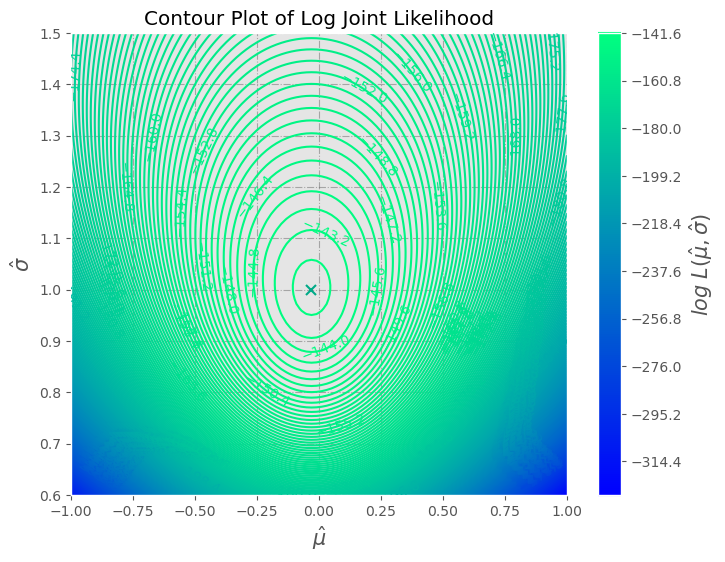

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Math

# 定義參數
mu = 0
sigma = 1

# 定義出對數概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 生成樣本資料
N = 100
x = norm.rvs(loc = mu, scale = sigma, size = N)

# 設置樣本 mu 和 sigma 的範圍
mu_values = np.linspace(-1, 1, 100)
sigma_values = np.linspace(0.6, 1.5, 100)
# SIGMA, MU = np.meshgrid(sigma_values, mu_values)
MU, SIGMA = np.meshgrid(mu_values, sigma_values)

# 計算對數概似函數的值
L_values = np.zeros((len(mu_values), len(sigma_values)))
for j, sigma_value in enumerate(sigma_values):
    for i, mu_value in enumerate(mu_values):
        L_values[i, j] = log_likelihood(x, mu_value, sigma_value)

# 找到最大值的位置
maxL_index = np.unravel_index(np.argmax(L_values), L_values.shape)
mu_mle = mu_values[maxL_index[0]]
sigma_mle = sigma_values[maxL_index[1]]
max_log_likelihood = L_values[maxL_index]

# 顯示計算結果
display(Math(r'\text{{運算結果：}}\; \hat{{\mu}}_{{MLE}} = {:.2f},\; \
            \hat{{\sigma}}_{{MLE}} = {:.2f},\; \
            log \; L(\hat{{\mu}}, \hat{{\sigma}}) = {:.2f}'.format(mu_mle, sigma_mle, max_log_likelihood)))

# 繪圖
plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 6))

# 等高線圖
contours = plt.contour(MU, SIGMA, L_values, levels = 250, cmap = 'winter', linewidths = 1.5)
plt.clabel(contours, inline = 0, fontsize = 10)
plt.plot(mu_mle, sigma_mle, color = '#00AA88', marker = 'x', markersize = 7, markeredgewidth = 1.5)
plt.xlabel('$\hat{\mu}$', fontsize = 15)
plt.ylabel('$\hat{\sigma}$', fontsize = 15)
plt.title('Contour Plot of Log Joint Likelihood')
cbar = plt.colorbar(contours)
cbar.ax.set_ylabel('$log \; L(\hat{\mu}, \hat{\sigma})$', fontsize = 15)
plt.grid(True, linestyle = '-.', alpha = 0.5, color = '#666666')
plt.show()

In [ ]:
mu_mle, sigma_mle, max_log_likelihood

In [2]:
log_likelihood(x, mu_mle, sigma_mle)

-142.11150467228708

In [ ]:

# 定義參數
mu = 0
sigma = 1

# 定義出對數概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 生成樣本資料
N = 100
# x = norm.rvs(loc = mu, scale = sigma, size = N)

# 設置樣本 mu 和 sigma 的範圍
mu_values = np.linspace(-1, 1, 100)
sigma_values = np.linspace(0.6, 1.5, 100)
MU, SIGMA = np.meshgrid(mu_values, sigma_values)

# 計算對數概似函數的值
L_values = np.zeros((len(mu_values), len(sigma_values)))
for i, mu_value in enumerate(mu_values):
    for j, sigma_value in enumerate(sigma_values):
        L_values[i, j] = log_likelihood(x, mu_value, sigma_value)

In [ ]:
# 定義參數
mu = 0
sigma = 1

# 定義出對數概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

##### <strong><font color=indianred>步驟 2</font></strong>：令 $\mu$ 與 $\sigma$ 未知，取樣本數 $N = 100$，定義對數聯合概似函數 $L(\mu, \; \sigma \; | x_1, x_2, \ldots, x_N)$，計算出最大概似估計值，並繪製立體圖 3D Plot，觀察估計量 $\hat{\mu}$ 與 $\hat{\sigma}$ 的變化。

<IPython.core.display.Math object>

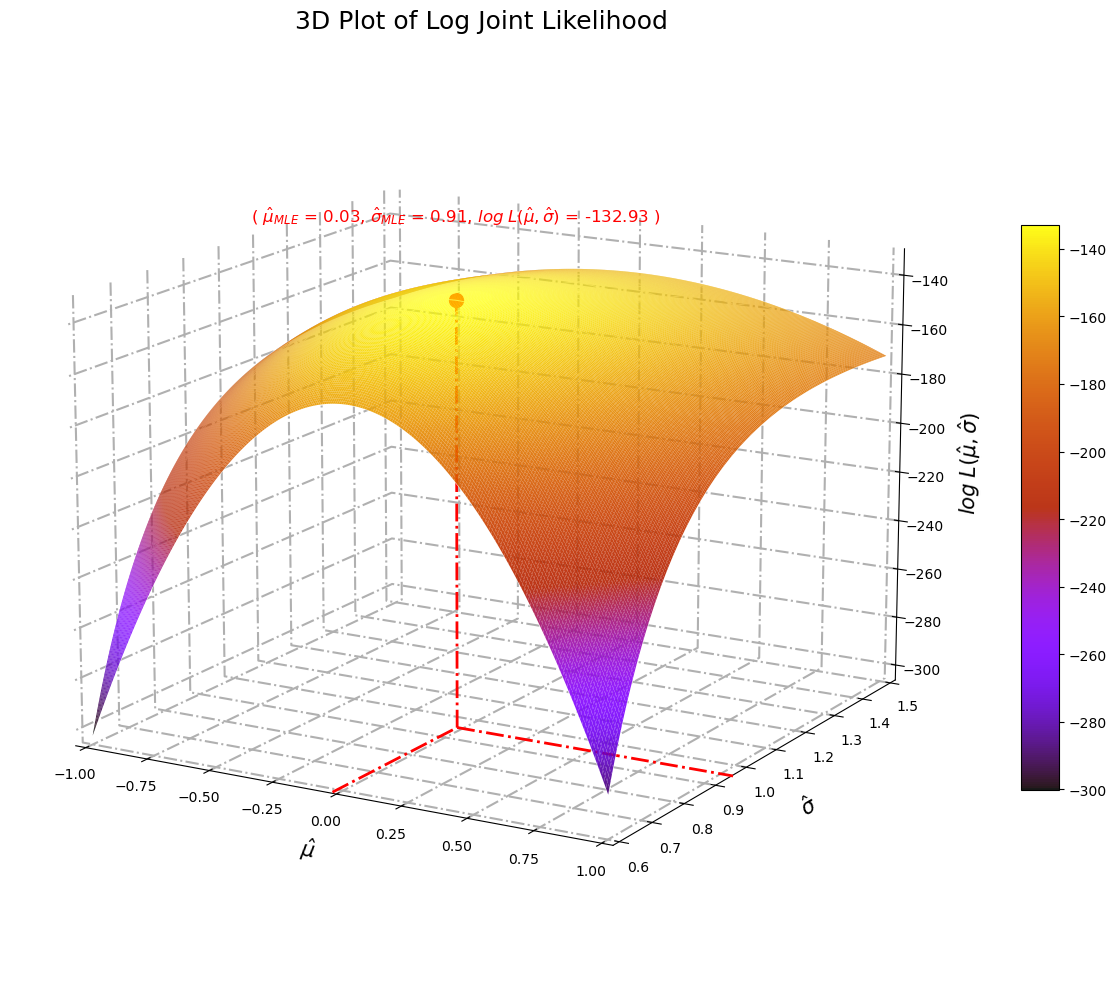

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Math

# 定義參數
mu = 0
sigma = 1
N = 100

# 定義對數概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 生成樣本資料
x = norm.rvs(loc = mu, scale = sigma, size = N)

# 設置 mu1 和 sigma1 的範圍，用於畫有顏色的 3D 圖
mu_values1 = np.linspace(-1, 1, 250)
sigma_values1 = np.linspace(0.6, 1.5, 250)
SIGMA1, MU1 = np.meshgrid(sigma_values1, mu_values1)
# 計算對數概似函數的值
L_values1 = np.zeros((len(mu_values1), len(sigma_values1)))
for i, mu_value1 in enumerate(mu_values1):
    for j, sigma_value1 in enumerate(sigma_values1):
        L_values1[i, j] = log_likelihood(x, mu_value1, sigma_value1)

# 設置 mu2 和 sigma2 的範圍，用於畫白色的 3D 圖
mu_values2 = np.linspace(-1, 1, 30)
sigma_values2 = np.linspace(0.6, 1.5, 30)
SIGMA2, MU2 = np.meshgrid(sigma_values2, mu_values2)
# 計算對數概似函數的值
L_values2 = np.zeros((len(mu_values2), len(sigma_values2)))
for i, mu_value2 in enumerate(mu_values2):
    for j, sigma_value2 in enumerate(sigma_values2):
        L_values2[i, j] = log_likelihood(x, mu_value2, sigma_value2)

# 找到最大值的位置
maxL_index = np.unravel_index(np.argmax(L_values1), L_values1.shape)
mu_mle = mu_values1[maxL_index[0]]
sigma_mle = sigma_values1[maxL_index[1]]
max_log_likelihood = L_values1[maxL_index]

# 顯示計算結果
display(Math(r'\text{{運算結果：}}\; \hat{{\mu}}_{{MLE}} = {:.2f},\; \
            \hat{{\sigma}}_{{MLE}} = {:.2f},\; \
            log \; L(\hat{{\mu}}, \hat{{\sigma}}) = {:.2f}'.format(mu_mle, sigma_mle, max_log_likelihood)))

# 繪圖
plt.style.use('default')
fig = plt.figure(figsize = (14, 10))

# 3D 圖
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(MU1, SIGMA1, L_values1, cmap = 'gnuplot', rstride = 1, cstride = 1, alpha = 0.9)
ax.plot_wireframe(MU2, SIGMA2, L_values2, color = 'white', rstride = 2, cstride = 2, alpha = 0.8
                   , linestyle = '-', linewidth = 0.7)

# 繪製最大值點
ax.scatter(mu_mle, sigma_mle, max_log_likelihood, color = 'red', s = 100)
# 繪製垂直線
ax.plot([mu_mle, mu_mle], [sigma_mle, sigma_mle], [L_values1.min(), max_log_likelihood]
        , color = 'red', linestyle = '-.', lw = 2)
# # 繪製連接到 x 軸的線
ax.plot([mu_mle, mu_mle], [0.55, sigma_mle], [L_values1.min(), L_values1.min()]
        , color = 'red', linestyle = '-.', lw = 2)
# 繪製連接到 y 軸的線
ax.plot([mu_mle, 1.09], [sigma_mle, sigma_mle], [L_values1.min(), L_values1.min()]
        , color = 'red', linestyle = '-.', lw = 2)

# # 添加標籤
ax.text(mu_mle, sigma_mle, max_log_likelihood + (0.3 * N), f'( $\hat{{\mu}}_{{MLE}}$ = {mu_mle:.2f}, $\hat{{\sigma}}_{{MLE}}$ = {sigma_mle:.2f}, $log \; L(\hat{{\mu}}, \hat{{\sigma}})$ = {max_log_likelihood:.2f} )'
        , color = 'red', ha = 'center', fontsize = 12)

# 令背景透明
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# 設置網格線的樣式
ax.xaxis._axinfo["grid"]['linestyle'] = '-.'
ax.yaxis._axinfo["grid"]['linestyle'] = '-.'
ax.zaxis._axinfo["grid"]['linestyle'] = '-.'
ax.xaxis._axinfo["grid"]['linewidth'] = 1.5
ax.yaxis._axinfo["grid"]['linewidth'] = 1.5
ax.zaxis._axinfo["grid"]['linewidth'] = 1.5

ax.set_xlim(-1, 1)
ax.set_ylim(0.6, 1.5)
ax.set_zlim(L_values1.min(), L_values1.max())
ax.set_xlabel('$\hat{\mu}$', fontsize = 15, labelpad = 10)
ax.set_ylabel('$\hat{\sigma}$', fontsize = 15, labelpad = 10)
ax.set_zlabel('$log \; L(\hat{\mu}, \hat{\sigma})$', fontsize = 15, labelpad = 10)
ax.set_title('3D Plot of Log Joint Likelihood', fontsize = 18)
ax.view_init(15, -60)  # 調整視角, 第一個參數是上下，第二個參數是左右
fig.colorbar(surf, ax = ax, shrink = 0.6, aspect = 15)

plt.tight_layout()
plt.show()

In [10]:
log_likelihood(x, mu_mle, sigma_mle)

-142.8694206493597

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=indianred>觀察</font>**：
- 步驟一假設 $\mu$ 與 $\sigma$ 未知，取樣本數 $N = 100$，計算出最大概似估計值，並繪製等高線圖 Contour Plot 來觀察估計量 $\hat{\mu}$ 與 $\hat{\sigma}$ 的變化。首先，可從運算結果中看出 $\hat{\mu}_{MLE}$ 與 $\hat{\sigma}_{MLE}$ 的值，搭配等高線圖可見 marker ‘x’ 為 $log \; L(\hat{\mu}, \hat{\sigma})$ 的最大值所在，其對應的 $\hat{\mu}$ 與 $\hat{\sigma}$ 分別落在各自的母體參數值 $\mu = 0$，$\sigma = 1$ 的附近。

- 步驟二假設 $\mu$ 與 $\sigma$ 未知，取樣本數 N = 100，計算出最大概似估計值，並繪製立體圖 3D Plot 來觀察估計量 $\hat{\mu}$ 與 $\hat{\sigma}$ 的變化。首先，可從運算結果中看出 $\hat{\mu}_{MLE}$ 與 $\hat{\sigma}_{MLE}$ 的值，搭配立體圖可見原點為 $log \; L(\hat{\mu}, \hat{\sigma})$ 的最大值所在，並且可從垂直線延伸到 x、y 軸的直線看出其對應的 $\hat{\mu}$ 與 $\hat{\sigma}$（由於視角問題，從垂直線延伸到 x、y 軸的直線會看起來與估計值對應不起來，可通過 ax.view_init() 來進行確認）分別落在各自的母體參數值 $\mu = 0$，$\sigma = 1$ 的附近。

**<font color=indianred>結論</font>**：通過對前兩步驟的觀察，發現當 $\sigma$ 也設為未知時，單從運算結果來看估計值會很抽象，可是在畫出等高線圖和立體圖後，就更加直觀地感受到並了解常態分佈的兩個未知參數之最大概似估計概念。

<hr>

### <strong><font color=cornflowerblue>目標四</font></strong>：
令 $\mu$ 與 $\sigma$ 未知，取樣本數 $N = 10、100、500、1000$，分別針對每個 $N$ 生成一組樣本，估計出 $\mu$ 與 $\sigma$ 的最大概似估計值，接著將前述步驟重複執行 1000 次，獲得 1000 筆 $\mu$ 與 $\sigma$ 的最大概似估計值，取平均，繪圖觀察隨著樣本數的增加， $\bar{\mu}_{MLE}$ 與 $\bar{\sigma}_{MLE}$ 的變化

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

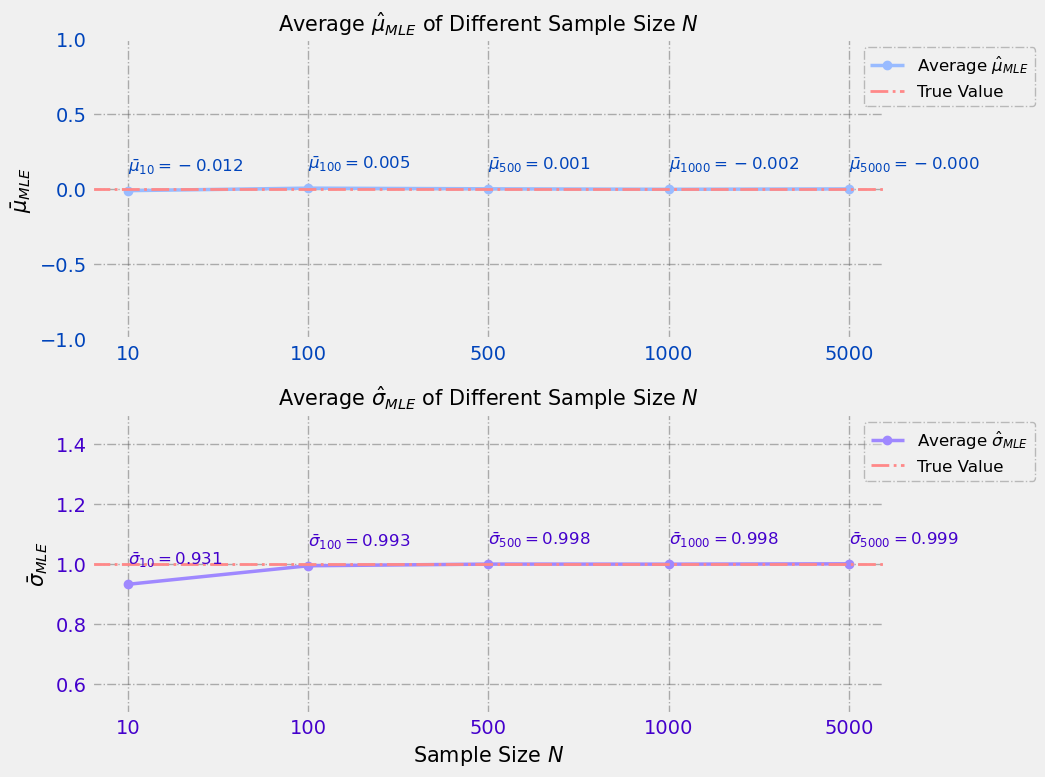

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import display, Math

# 定義參數
mu = 0
sigma = 1

# 定義對數概似函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 生成樣本資料
mu_est = np.linspace(-1, 1, 100)
sigma_est = np.linspace(0.6, 1.5, 100)

MU_MLE_AVG = []
SIGMA_MLE_AVG = []
N_values = [10, 100, 500, 1000, 5000]

for N in N_values:
    MU_MLE = []
    SIGMA_MLE = []

    for _ in range(1000):  # 先設 10 次
        x = norm.rvs(loc = mu, scale = sigma, size = N)
        L_values = np.zeros((len(mu_est), len(sigma_est)))
        for i, mu_val in enumerate(mu_est):
            for j, sigma_val in enumerate(sigma_est):
                L_values[i, j] = log_likelihood(x, mu_val, sigma_val)

        # 找到最大值的位置
        max_index = np.unravel_index(np.argmax(L_values), L_values.shape)
        mu_mle = mu_est[max_index[0]]
        sigma_mle = sigma_est[max_index[1]]
        MU_MLE.append(mu_mle)
        SIGMA_MLE.append(sigma_mle)

    # 計算平均值
    MU_MLE_AVG.append(np.mean(MU_MLE))
    SIGMA_MLE_AVG.append(np.mean(SIGMA_MLE))

# 顯示計算結果
for i, N in enumerate(N_values):
    display(Math(r'\text{{當}}\; N = {}\; \text{{時}}， \bar{{\mu}}_{{MLE}} = {:.3f},\
                  \bar{{\sigma}}_{{MLE}} = {:.3f}'.format(N, MU_MLE_AVG[i], SIGMA_MLE_AVG[i])))

# 繪製結果
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (11, 8))

ax1.plot(MU_MLE_AVG, marker = 'o', linestyle = '-', color = '#99BBFF', lw = 2.5, label = 'Average $\hat{\mu}_{MLE}$')
ax1.axhline(y = mu, color = '#FF8888', linestyle='-.', lw = 2, label = 'True Value')
ax1.set_xticks(np.arange(len(N_values)))
ax1.set_xticklabels(N_values)
ax1.set_ylim([-1, 1])
ax1.set_yticks(np.arange(-1, 1.01, 0.5))
ax1.set_ylabel(r'$\bar{\mu}_{MLE}$', fontsize = 15, color = 'black')
ax1.set_title('Average $\hat{\mu}_{MLE}$ of Different Sample Size $N$', fontsize = 15, color = 'black')
ax1.grid(True, linestyle = '-.', alpha = 0.5, color = '#666666')
ax1.tick_params(axis = 'both', colors = '#0044BB')
legend1 = ax1.legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666', loc = 'upper right'
                    , bbox_to_anchor = (1.2, 1.0))
legend1.get_frame().set_linestyle('-.')  # 設置圖例外框的 linestyle
legend1.get_frame().set_linewidth(1)     # 設置圖例外框的 linestyle
legend1.get_frame().set_alpha(0.4)       # 設置圖例外框的 linestyle
for i, x in enumerate(range(5)):
    ax1.text(x, MU_MLE_AVG[i] + 0.1, r'$\bar{{\mu}}_{}={:.3f}$'.format({N_values[i]}, MU_MLE_AVG[i])
             , fontsize = 12, color = '#0044BB', ha = 'left', va = 'bottom')

ax2.plot(SIGMA_MLE_AVG, marker = 'o', linestyle = '-', color = '#9F88FF', lw = 2.5, label = 'Average $\hat{\sigma}_{MLE}$')
ax2.axhline(y = sigma, color='#FF8888', linestyle = '-.', lw = 2, label = 'True Value')
ax2.set_xticks(np.arange(len(N_values)))
ax2.set_xticklabels(N_values)
ax2.set_ylim([0.5, 1.5])
ax2.set_ylabel(r'$\bar{\sigma}_{MLE}$', fontsize = 15, color = 'black')
ax2.set_title('Average $\hat{\sigma}_{MLE}$ of Different Sample Size $N$', fontsize = 15, color = 'black')
ax2.grid(True, linestyle = '-.', alpha = 0.5, color = '#666666')
ax2.tick_params(axis = 'both', colors = '#4400CC')
legend2 = ax2.legend(prop = {'size': 12}, frameon = True, edgecolor = '#666666', loc = 'upper right'
                    , bbox_to_anchor = (1.2, 1.0))
legend2.get_frame().set_linestyle('-.')  # 設置圖例外框的 linestyle
legend2.get_frame().set_linewidth(1)     # 設置圖例外框的 linestyle
legend2.get_frame().set_alpha(0.4)       # 設置圖例外框的 linestyle
for i, x in enumerate(range(5)):
    ax2.text(x, SIGMA_MLE_AVG[i] + 0.05, r'$\bar{{\sigma}}_{}={:.3f}$'.format({N_values[i]}, SIGMA_MLE_AVG[i])
             , fontsize = 12, color = '#4400CC', ha = 'left', va = 'bottom')

plt.xlabel('Sample Size $N$', fontsize = 15, color = 'black')
plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=indianred>觀察</font>**：從圖中可見，通過重複生成最大概似估計值 1000 次並取平均，在考慮所有最大概似估計值之間的變異下，隨著樣本數 $N$ 越大，每組樣本的 MLE 變異都在逐漸下降，$\bar{\mu}_{MLE}$ 與 $\bar{\sigma}_{MLE}$ 會越接近母體的真實參數 $\mu = 0, \sigma = 1$。此外，隨著樣本數大於 1000 時，$\bar{\mu}_{MLE}$ 與 $\bar{\sigma}_{MLE}$ 逐漸趨於穩定，因此可判斷抽取大於 1000 筆的樣本數進行最大概似估計實驗最為適合，不會受到樣本間的變異影響。

**<font color=indianred>結論</font>**：上述實驗結果證實了最大概似估計 MLE 確實具有當樣本數 $N$ 越大，其估計值將收斂至母體參數值的性質。此外，由於時間限制，無法改用其他分佈重複執行以上的實驗，但理論上無論參數來自何種分佈，都可使用 MLE 來對其進行估計，其估計結果皆會隨著樣本數越大而越接近母體參數（Asymptotically Unbiased），且根據中央極限定理（CLT），最大概似估計量會近似於常態分佈，可以利用 Fisher Information 來算出估計量的變異數（Asymptotically Normality），使得在計算上變得很方便，因此 MLE 是用來估計參數的首選之一。

<hr>

### <strong><font color=lightseagreen>Extra 內容</font></strong>：

**1. 傳統計算 $\hat{\mu}_{MLE}$ 的 Formula 推導**

- 令 $\sigma^2$ 已知，給定 $N$ 個獨立樣本 $x_1, x_2, \ldots, x_N$，其機率密度函數 PDF 為：
$$
f(x_i; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} 
$$

- 聯合概似函數 $L(\mu, \sigma^2)$ 為：
$$
\begin{align*}
L(\mu, \sigma^2) &= \prod_{i=1}^{N} f(x_i; \mu, \sigma^2) \\
&= \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} 
\end{align*}
$$

- 為了簡化計算，取對數 $log$ 得到對數聯合概似函數 $\ell(\mu, \sigma^2)$：
$$
\begin{align*}
\ell(\mu, \sigma^2) &= \log L(\mu, \sigma^2) \\
&= \sum_{i=1}^{N} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} \right) \\
&= \sum_{i=1}^{N} \left( \log \frac{1}{\sqrt{2\pi\sigma^2}} - \frac{(x_i - \mu)^2}{2\sigma^2} \right) \\
&= -\frac{N}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^2
\end{align*}
$$

- 對 $\mu$ 求導數並設為零，以找到最大值：
$$
\begin{align*}
\frac{\partial \ell(\mu, \sigma^2)}{\partial \mu} &= -\frac{1}{2\sigma^2} \cdot 2 \sum_{i=1}^{N} (x_i - \mu) \cdot (-1) \\
&= \frac{1}{\sigma^2} \sum_{i=1}^{N} (x_i - \mu) \\
&= \frac{1}{\sigma^2} \left( \sum_{i=1}^{N} x_i - N\mu \right) 
\end{align*}
$$

- 設 $\frac{\partial \ell(\mu, \sigma^2)}{\partial \mu} = 0，得$：
$$
\sum_{i=1}^{N} x_i - N\mu = 0 
$$
$$
\mu = \frac{1}{N} \sum_{i=1}^{N} x_i 
$$

因此，常態分佈的參數 $\mu$ 之最大概似估計為樣本平均 $\bar{x}$：
$$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

**2. 傳統計算 $\hat{\sigma}_{MLE}$ 的 Formula 推導**

- 令 $\mu$ 已知，給定 $N$ 個獨立樣本 $x_1, x_2, \ldots, x_N$，其機率密度函數 PDF 為：$$ f(x_i; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} $$

- 聯合概似函數 $L(\mu, \sigma^2)$ 為： 
$$ \begin{align*} 
L(\mu, \sigma^2) &= \prod_{i=1}^{N} f(x_i; \mu, \sigma^2) \\
&= \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} \end{align*} 
$$

- 為了簡化計算，取對數 $log$ 得到對數聯合概似函數 $\ell(\mu, \sigma^2)$： 
$$ \begin{align*} 
\ell(\mu, \sigma^2) &= \log L(\mu, \sigma^2) \\ 
&= \sum_{i=1}^{N} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} \right) \\
&= \sum_{i=1}^{N} \left( \log \frac{1}{\sqrt{2\pi\sigma^2}} - \frac{(x_i - \mu)^2}{2\sigma^2} \right) \\
&= -\frac{N}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^2 
\end{align*} 
$$

- 對 $\sigma^2$ 求導數並設為零，以找到最大值： 
$$ \begin{align*} 
\frac{\partial \ell(\mu, \sigma^2)}{\partial \sigma^2} &= -\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{N} (x_i - \mu)^2 \\ 
&= -\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{N} (x_i - \mu)^2 
\end{align*} 
$$

- 設 $\frac{\partial \ell(\mu, \sigma^2)}{\partial \sigma^2} = 0，得$： 
$$ 
\begin{align*} 
-\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{N} (x_i - \mu)^2 &= 0 \\
\frac{1}{2\sigma^4} \sum_{i=1}^{N} (x_i - \mu)^2 &= \frac{N}{2\sigma^2} \\ 
\sum_{i=1}^{N} (x_i - \mu)^2 &= N\sigma^2 \\ 
\sigma^2 &= \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 
\end{align*} 
$$

因此，常態分佈的參數 $\sigma$ 之最大概似估計為： $$\hat{\sigma}_{MLE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

<hr>